In [ ]:
%load_ext autoreload
%autoreload 2

import os
from collections import (
    Counter,
    defaultdict,
)
from datetime import datetime

import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import seaborn as sns

from wordcloud import WordCloud

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

import plot
import preprocess

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.


In [ ]:
test_data = pd.read_csv("Corona_NLP_test.csv")
train_data = pd.read_csv("Corona_NLP_train.csv")

In [ ]:
import re

# Renaming coulm "OriginalTweet" to "Tweet" for train and test d
train_data.rename(columns={'OriginalTweet': 'Tweet'}, inplace=True)
test_data.rename(columns={'OriginalTweet': 'Tweet'}, inplace=True)
train_data.head()

,UserName,ScreenName,Location,TweetAt,Tweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [ ]:
test_data.head()

,UserName,ScreenName,Location,TweetAt,Tweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


In [ ]:
train_data = preprocess.tweets(train_data)
test_data = preprocess.tweets(test_data)

/work/preprocess.py:36: FutureWarning: The default value of regex will change from True to False in a future version.
  df.Tweet = df.Tweet.str.replace(reg, replace)


In [ ]:
sentiment_map = {
    'Extremely Negative': -2,
    'Negative': -1,
    'Neutral': 0,
    'Positive': 1,
    'Extremely Positive': 2,
}

binary_sentiment_map = {
    'Extremely Negative': 0,
    'Negative': 0,
    'Neutral': 1,
    'Positive': 1,
    'Extremely Positive': 1,
}


train_data['sentiment'] = train_data['Sentiment'].map(sentiment_map, na_action=None)
train_data['sentiment_bin'] = train_data['Sentiment'].map(binary_sentiment_map, na_action=None)
test_data['sentiment'] = test_data['Sentiment'].map(sentiment_map, na_action=None)
test_data['sentiment_bin'] = test_data['Sentiment'].map(binary_sentiment_map, na_action=None)

In [ ]:
include_cols = ['Tweet', 'tokenized_tweets']
df = train_data[include_cols]

In [ ]:
text_len = preprocess.word_count(df.Tweet)
df= df[text_len > 2]

In [ ]:
df.head()

,Tweet,tokenized_tweets
1,advice talk neighbour family exchange phone nu...,"[advice, talk, neighbour, family, exchange, ph..."
2,coronavirus australia woolworth give elderly d...,"[coronavirus, australia, woolworth, give, elde..."
3,food stock one empty please panic enough food ...,"[food, stock, one, empty, please, panic, enoug..."
4,ready go supermarket outbreak paranoid food st...,"[ready, go, supermarket, outbreak, paranoid, f..."
5,news region first confirmed covid case came su...,"[news, region, first, confirmed, covid, case, ..."


In [ ]:
pip install --upgrade pip

     |████████████████████████████████| 2.1 MB 8.0 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.1
    Uninstalling pip-21.1.1:
      Successfully uninstalled pip-21.1.1
Note: you may need to restart the kernel to use updated packages.


In [ ]:
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 21.8 MB/s eta 0:00:00


In [ ]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(df['tokenized_tweets'])
# Create Corpus
texts = df['tokenized_tweets']
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [ ]:
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 2), (13, 2), (14, 1), (15, 1), (16, 2), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1)]]


In [ ]:
from pprint import pprint
from gensim.models import LdaMulticore
from gensim.models import LdaModel


lda_model = LdaModel(corpus=corpus,
                   id2word=id2word,
                   num_topics=5,
                   random_state=0)

# Print the Keyword in the topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.025*"hand" + 0.025*"sanitizer" + 0.018*"shopping" + 0.017*"online" + '
  '0.016*"mask" + 0.013*"grocery" + 0.012*"supermarket" + 0.012*"store" + '
  '0.008*"covid" + 0.007*"home"'),
 (1,
  '0.040*"store" + 0.034*"grocery" + 0.024*"supermarket" + 0.012*"people" + '
  '0.011*"covid" + 0.011*"worker" + 0.009*"go" + 0.008*"like" + 0.008*"going" '
  '+ 0.007*"work"'),
 (2,
  '0.042*"consumer" + 0.040*"covid" + 0.016*"pandemic" + 0.012*"demand" + '
  '0.010*"business" + 0.009*"online" + 0.008*"new" + 0.007*"coronavirus" + '
  '0.007*"crisis" + 0.007*"impact"'),
 (3,
  '0.040*"food" + 0.013*"covid" + 0.012*"people" + 0.010*"paper" + '
  '0.010*"need" + 0.009*"stock" + 0.009*"toilet" + 0.009*"buying" + '
  '0.008*"panic" + 0.007*"supply"'),
 (4,
  '0.066*"price" + 0.023*"covid" + 0.017*"oil" + 0.010*"market" + 0.007*"low" '
  '+ 0.006*"demand" + 0.006*"food" + 0.006*"cut" + 0.005*"people" + '
  '0.005*"gas"')]


In [ ]:
# Coherence and perplexity 

from gensim.models.coherencemodel import CoherenceModel

coherence_model_lda = CoherenceModel(model=lda_model, texts=df['tokenized_tweets'], dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)

perplexity = lda_model.log_perplexity(corpus)
print("perplexity score is : ", perplexity)

Coherence Score:  0.3955907398292279
perplexity score is :  -8.135251589758361


### Dominant&nbsp;topic&nbsp;and&nbsp;its&nbsp;percentage&nbsp;contribution&nbsp;in&nbsp;each&nbsp;document.&nbsp;

In [ ]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)

        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

        # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


In [ ]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=texts)

In [ ]:
# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,2.0,0.4980,"consumer, covid, pandemic, demand, business, o...",NaN
1,1,2.0,0.5617,"consumer, covid, pandemic, demand, business, o...","[advice, talk, neighbour, family, exchange, ph..."
2,2,3.0,0.8175,"food, covid, people, paper, need, stock, toile...","[coronavirus, australia, woolworth, give, elde..."
3,3,3.0,0.6256,"food, covid, people, paper, need, stock, toile...","[food, stock, one, empty, please, panic, enoug..."
4,4,3.0,0.5674,"food, covid, people, paper, need, stock, toile...","[ready, go, supermarket, outbreak, paranoid, f..."
5,5,1.0,0.4179,"store, grocery, supermarket, people, covid, wo...","[news, region, first, confirmed, covid, case, ..."
6,6,3.0,0.7181,"food, covid, people, paper, need, stock, toile...","[cashier, grocery, store, sharing, insight, pr..."
7,7,2.0,0.5304,"consumer, covid, pandemic, demand, business, o...","[supermarket, today, buy, toilet, paper]"
8,8,0.0,0.9628,"hand, sanitizer, shopping, online, mask, groce...","[due, covid, retail, store, classroom, atlanta..."
9,9,1.0,0.9504,"store, grocery, supermarket, people, covid, wo...","[corona, prevention, stop, buy, thing, cash, u..."


In [ ]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

### The most representative sentence for each topic 

In [ ]:
# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.9689,"hand, sanitizer, shopping, online, mask, grocery, supermarket, store, covid, home","[covid, may, affect, retail, store, prepare, guest, post, vend]"
1,1.0,0.9731,"store, grocery, supermarket, people, covid, worker, go, like, going, work","[walmart, cut, store, hour, restocking, retail, giant, reduced, store, operating, hour, give, em..."
2,2.0,0.9689,"consumer, covid, pandemic, demand, business, online, new, coronavirus, crisis, impact","[alien, anthropologist, survey, archive, earth, search, hell, happened, sloat, essay, might, sin..."
3,3.0,0.9730,"food, covid, people, paper, need, stock, toilet, buying, panic, supply","[supermarket, staff, getting, bonus, working]"
4,4.0,0.9709,"price, covid, oil, market, low, demand, food, cut, people, gas","[let, remember, regularly, check, colleague, employee, today]"


### Word cloud&nbsp;of&nbsp;Top&nbsp;N&nbsp;words&nbsp;in&nbsp;each&nbsp;topic

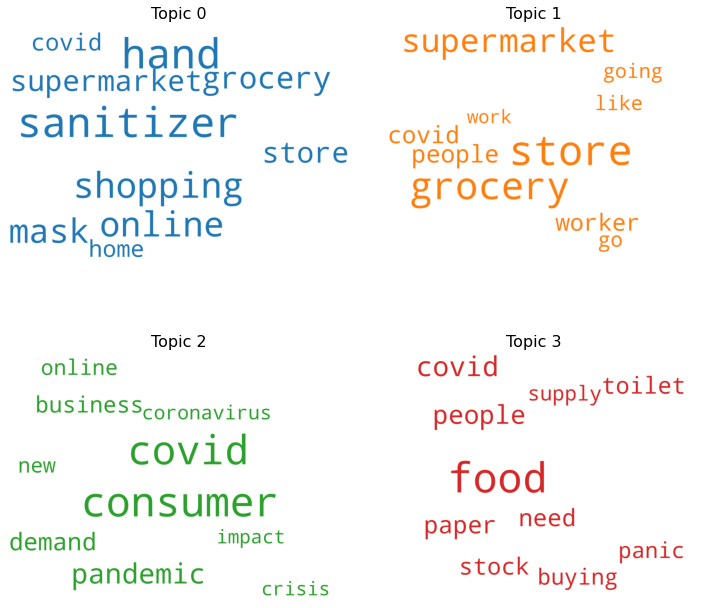

In [ ]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()] 
cloud = WordCloud(
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab11',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')

plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.savefig("cloud.png")
plt.show()

In [ ]:
pip install pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 23.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.5/381.5 kB 29.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136882 sha256=de81681a61d1ada2b8d373cb21ad47d08f7525be4bb2254cb06d9d8b68ce8f7a
  Stored in directory: /root/.cache/pip/wheels/90/61/ec/9dbe9efc3acf9c4e37ba70fbbcc3f3a0ebd121060aa593181a
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1317 sha256=1ba657de053d7ace38af133930c112e78801a705dcc9ab4e239c1b62cbc5afce
  Stored in directory: /root/.cache/pip/wheels/22/0b/40/fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897
Successfully built pyLDAvis sklearn
Note: you may need to restart the kernel to use updated pac

### pyLDAvis

In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

lda_viz = gensimvis.prepare(lda_model, corpus, id2word)
lda_viz


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.144890  0.030202       1        1  24.084866
2     -0.199489  0.159814       2        1  21.095776
3      0.037300 -0.110745       3        1  19.694736
4     -0.138892 -0.149169       4        1  17.993573
0      0.156192  0.069899       5        1  17.131049, topic_info=         Term         Freq         Total Category  logprob  loglift
311     price  8889.000000   8889.000000  Default  30.0000  30.0000
172  consumer  5800.000000   5800.000000  Default  29.0000  29.0000
75      store  7676.000000   7676.000000  Default  28.0000  28.0000
84    grocery  6682.000000   6682.000000  Default  27.0000  27.0000
39       food  6581.000000   6581.000000  Default  26.0000  26.0000
..        ...          ...           ...      ...      ...      ...
121      time   570.821589   2816.042756   Topic5  -5.2445   0.1683
27      covid   812.568896  12232.593845   Topic5  -4.8913  -0.9474
466       day   461.682389   1911.017475   Topic5  -5.4567   0.3438
314    worker   468.442966   2979.248481   Topic5  -5.4421  -0.0857
156      help   395.003294   2091.026104   Topic5  -5.6127   0.0978

[408 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
509       1  0.165592  across
509       2  0.707382  across
509       3  0.070738  across
509       4  0.054661  across
509       5  0.003215  across
...     ...       ...     ...
974       1  0.198567    year
974       2  0.100894    year
974       3  0.060107    year
974       4  0.506615    year
974       5  0.134167    year

[951 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 4, 5, 1])

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=243f1686-a373-41e3-b8f2-7f0cf58b8249' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>